In [1]:
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
monthly_budget = 900
df = pd.read_csv (r'FETCH EXPENSE AND REWARDS SUMMARY.csv') #read.csv file stored in capstone project folder
# Get the number of rows and columns
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print(f'Number of rows and columns: {str(rows)} and {str(cols)}')
print(df.head(5)) #print top 5 rows
print(df.tail(5)) #print bottom 5 rows

Number of rows and columns: 97 and 8
  TRANSACTION_DATE     STORE_NAME     CATEGORY  NUMBER_OF_ITEMS  \
0       01/15/2022  REMKE MARKETS      GROCERY                9   
1          1/15/22            CVS      GROCERY                2   
2       01/16/2022     APPLEBEE’S  RESTAURANTS                9   
3       01/18/2022            CVS      GROCERY                1   
4       01/25/2022         COSTCO      GROCERY               41   

   TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED SPECIAL_OFFER_BONUS(Y/N)  \
0                  30.19                    25                        N   
1                  22.87                    25                        N   
2                  72.98                    25                        N   
3                  10.91                    25                        N   
4                 501.94                   214                        Y   

  EXCEPTION  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
   TRANSACTION_DATE      

In [3]:
index = [list(df.columns)]   
print(index)
print(df.dtypes)
print(type(df))


[['TRANSACTION_DATE', 'STORE_NAME', 'CATEGORY', 'NUMBER_OF_ITEMS', 'TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED', 'SPECIAL_OFFER_BONUS(Y/N)', 'EXCEPTION']]
TRANSACTION_DATE             object
STORE_NAME                   object
CATEGORY                     object
NUMBER_OF_ITEMS               int64
TOTAL_AMOUNT_SPENT($)       float64
FETCH_REWARDS_EARNED          int64
SPECIAL_OFFER_BONUS(Y/N)     object
EXCEPTION                    object
dtype: object
<class 'pandas.core.frame.DataFrame'>


In [10]:
# formatting to correct datetime
df['TRANSACTION_DATE'] = pd.to_datetime(df['TRANSACTION_DATE']) 
print(df.dtypes)
print(df.head(5)) #print top 5 rows

TRANSACTION_DATE            datetime64[ns]
STORE_NAME                          object
CATEGORY                            object
NUMBER_OF_ITEMS                      int64
TOTAL_AMOUNT_SPENT($)              float64
FETCH_REWARDS_EARNED                 int64
SPECIAL_OFFER_BONUS(Y/N)            object
EXCEPTION                           object
dtype: object
  TRANSACTION_DATE     STORE_NAME     CATEGORY  NUMBER_OF_ITEMS  \
0       2022-01-15  REMKE MARKETS      GROCERY                9   
1       2022-01-15            CVS      GROCERY                2   
2       2022-01-16     APPLEBEE’S  RESTAURANTS                9   
3       2022-01-18            CVS      GROCERY                1   
4       2022-01-25         COSTCO      GROCERY               41   

   TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED SPECIAL_OFFER_BONUS(Y/N)  \
0                  30.19                    25                        N   
1                  22.87                    25                        N   
2             

In [11]:
#removing rows where fetch rewards=0 and replacing it with new dataframe
for rewards in df.index:
    if df.loc[rewards, 'FETCH_REWARDS_EARNED'] == 0: #remove rows where fetch rewards earned =0
        df.drop(rewards, inplace = True) #replace with new data 
        
#replacing one of the value in category from expenses to medical expenses        
df.loc[df['CATEGORY'] == 'EXPENSES', 'CATEGORY'] = 'MEDICAL EXPENSES'   

rows = len(df.axes[0]) #Using len() function to get no. of rows
cols = len(df.axes[1]) #Using len() function to get no. of columns
  
# Print the number of rows and columns
print(f'Number of rows and columns: {str(rows)} and {str(cols)}')
print(df.head(5))

Number of rows and columns: 89 and 8
  TRANSACTION_DATE     STORE_NAME     CATEGORY  NUMBER_OF_ITEMS  \
0       2022-01-15  REMKE MARKETS      GROCERY                9   
1       2022-01-15            CVS      GROCERY                2   
2       2022-01-16     APPLEBEE’S  RESTAURANTS                9   
3       2022-01-18            CVS      GROCERY                1   
4       2022-01-25         COSTCO      GROCERY               41   

   TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED SPECIAL_OFFER_BONUS(Y/N)  \
0                  30.19                    25                        N   
1                  22.87                    25                        N   
2                  72.98                    25                        N   
3                  10.91                    25                        N   
4                 501.94                   214                        Y   

  EXCEPTION  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [22]:
#Analyzing the expenses
total_number_of_items_purchased = df['NUMBER_OF_ITEMS'].sum()
total_amount_spent = df['TOTAL_AMOUNT_SPENT($)'].sum()
maximum_amt_spent = df['TOTAL_AMOUNT_SPENT($)'].max()
minimum_amt_spent = df['TOTAL_AMOUNT_SPENT($)'].min()
average_amt_spent = round(df['TOTAL_AMOUNT_SPENT($)'].mean(), 2)
number_of_trans = df['TRANSACTION_DATE'].count()
average_cost_of_each_item = round(total_amount_spent / total_number_of_items_purchased, 2)
average_cost_per_transaction = round(total_amount_spent / number_of_trans, 2)

print('Analysis of expenses Jan-Sept 2022')
print(f'Total number of items purchased : {total_number_of_items_purchased}')
print(f'Total amount spent : $ {total_amount_spent}')
print(f'Maximum amount spent : ${maximum_amt_spent}')
print(f'Minimum amount spent : ${minimum_amt_spent}')
print(f'Average amount spent : ${average_amt_spent}')
print(f'Total number of transaction : {number_of_trans}')
print(f'Average cost of each item : ${average_cost_of_each_item}')
print(f'Average cost per transaction : ${average_cost_per_transaction}')



Analysis of expenses Jan-Sept 2022
Total number of items purchased : 815
Total amount spent : $ 6508.27
Maximum amount spent : $501.94
Minimum amount spent : $0.31
Average amount spent : $73.13
Total number of transaction : 89
Average cost of each item : $7.99
Average cost per transaction : $73.13


                  TOTAL_AMOUNT_SPENT($)  FETCH_REWARDS_EARNED
TRANSACTION_DATE                                             
1                                819.93                   427
2                                639.11                   444
3                                492.14                   350
4                                858.99                  1255
5                                172.98                   150
6                                770.58                  1734
7                                362.64                   317
8                               1310.65                   801
9                               1081.25                   711


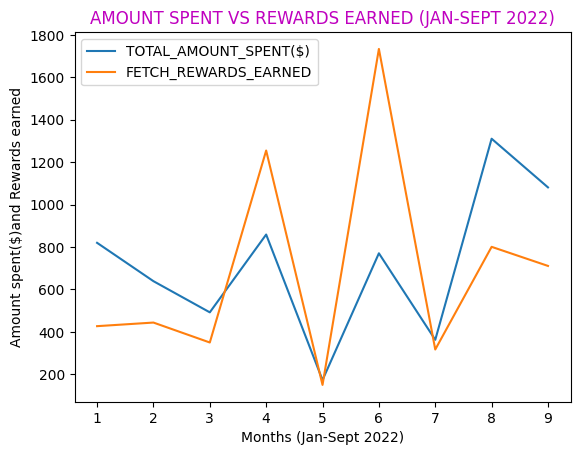

In [38]:
#grouping by month to get total spent n rewards
monthly_expense_rewards = df.groupby(df.TRANSACTION_DATE.dt.month)[['TOTAL_AMOUNT_SPENT($)', 'FETCH_REWARDS_EARNED']].sum()
print(monthly_expense_rewards)


#plotting the data to see how much rewards is earned vs the amount spent
plt.plot(monthly_expense_rewards)
plt.xlabel('Months (Jan-Sept 2022)')
plt.ylabel('Amount spent($)and Rewards earned')
plt.title('AMOUNT SPENT VS REWARDS EARNED (JAN-SEPT 2022)', c='m')
plt.legend(monthly_expense_rewards)
